In [26]:
# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from IPython.display import HTML
import util
import os

/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/h

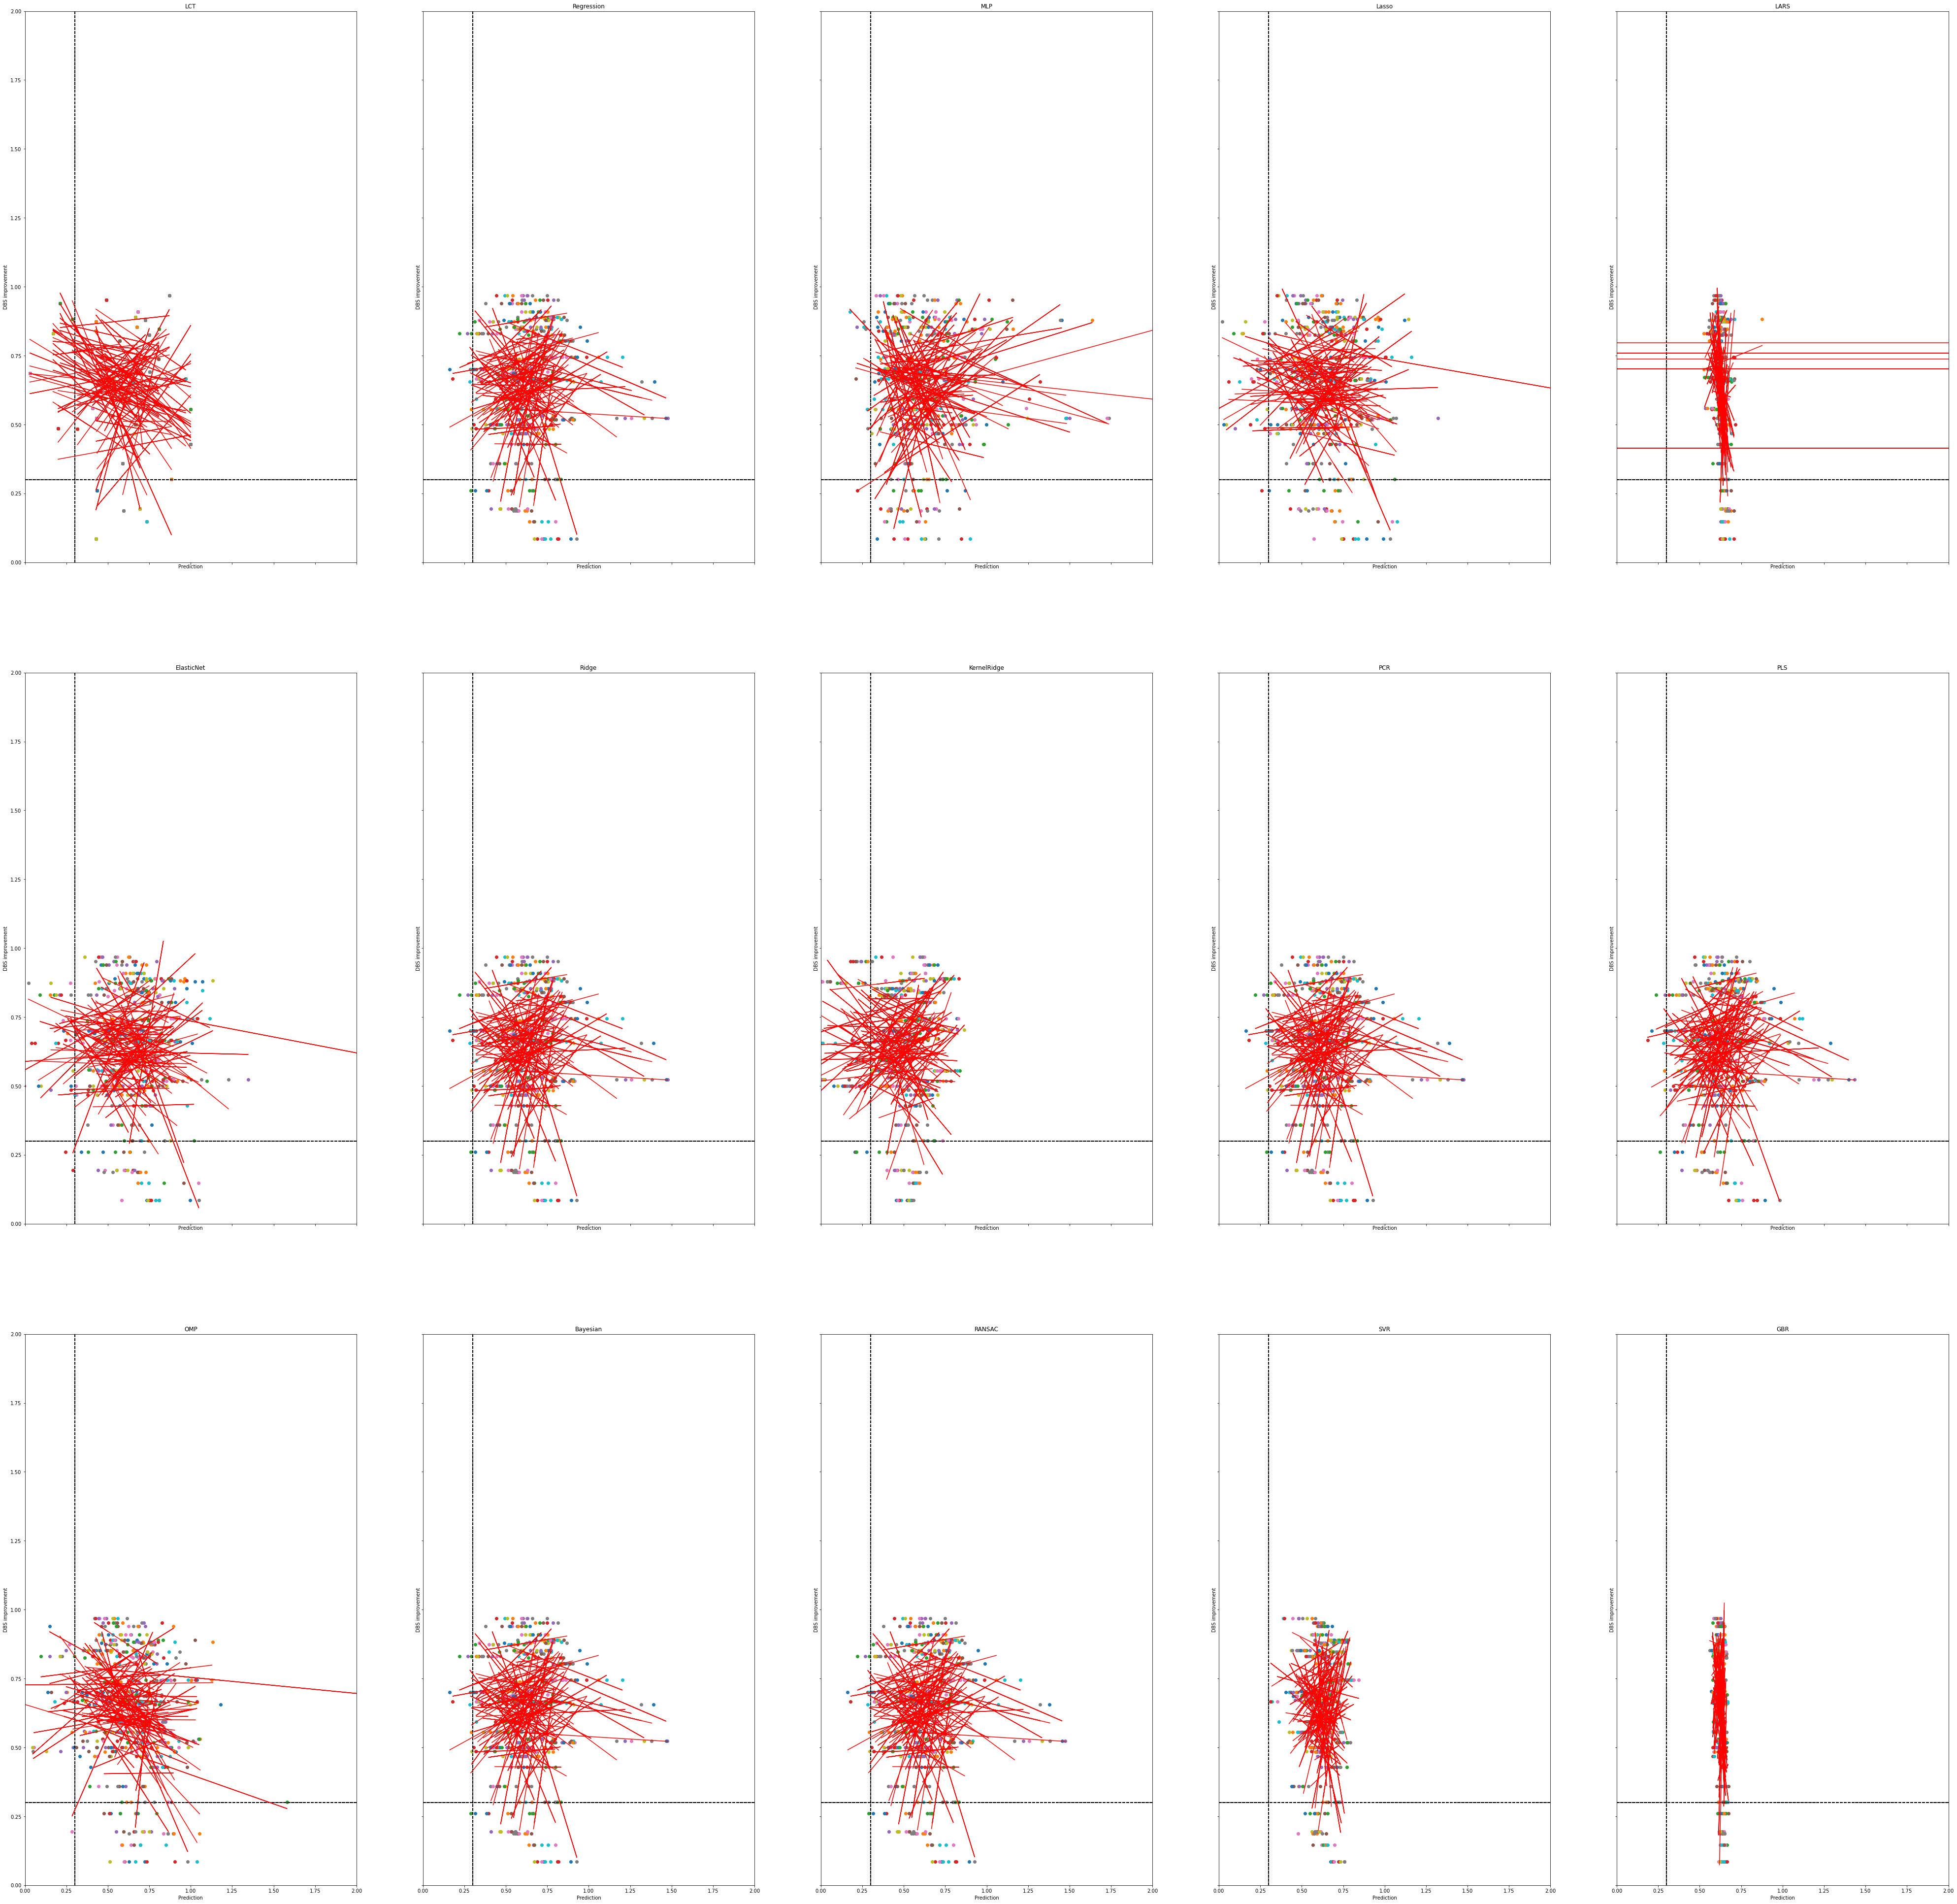

In [27]:
combdir = '/home/ali/RadDBS-QSM/data/sm_k_100_n_100/'
combs = os.listdir(combdir)
lr = []
[fig,ax] = plt.subplots(3,5,sharex=True, sharey=True)
plt.rcParams["figure.figsize"] = (70,70)
ax = np.ravel(ax)
names = ['LCT','Regression','MLP','Lasso','LARS',
                                'ElasticNet','Ridge','KernelRidge','PCR',
                                'PLS','OMP','Bayesian','RANSAC','SVR','GBR']
for j in np.arange(len(combs)):
    yh = np.load(combdir+combs[j])
    for jj in np.arange(yh.shape[0]-1):
        lr = linregress(yh[jj],yh[-1])
        ax[jj].scatter(yh[jj],yh[-1])
        ax[jj].plot(yh[jj],yh[jj]*lr.slope+lr.intercept,'-r')
        ax[jj].set_title(names[jj])
        ax[jj].set_ylabel("DBS improvement")
        ax[jj].set_xlabel("Prediction")
        # text = f"$y={lr.slope:0.2f}\; x{lr.intercept:+0.2f}$\n$r = {lr.rvalue:0.2f}$\n$p = {lr.pvalue:0.3f}$"
        # ax[jj].text(0.35, 0.75, text,transform=ax[jj].transAxes,
        #     fontsize=14, verticalalignment='top')
        ax[jj].hlines(0.3,0,2,linestyle='dashed',color='black')
        ax[jj].vlines(0.3,0,2,linestyle='dashed',color='black')
        ax[jj].set_xlim([0,2])
        ax[jj].set_ylim([0,2])
plt.rcParams["figure.figsize"] = (70,70)